In [1]:
import pandas as pd

In [2]:
gdpdelta_file = 'gdp_delta_updated.csv'
gdpdelta_df = pd.read_csv(gdpdelta_file)
gdpdelta_df = gdpdelta_df.applymap(lambda x: 'NaN' if x == ':' else x)

labour_productivity_file = 'LabourProductivity.csv'
labour_df = pd.read_csv(labour_productivity_file)

gdp_file = "gdp_updated.csv"
gdp_df = pd.read_csv(gdp_file)

income_inequality_file = "incomeinequality_reformatted.csv"
income_ineq_df = pd.read_csv(income_inequality_file)

print(income_ineq_df)
# print(gdpdelta_df)
# print(gdp_df)
# print(labour_df)

                                 Country Name Country Code   2009  2010  2011  \
0                                     Austria          AUT   4.15  4.34  4.12   
1                                     Belgium          BEL   3.91  3.92  3.86   
2                                    Bulgaria          BGR   5.91  5.86  6.46   
3                                 Switzerland          CHE   4.76  4.48  4.52   
4                                      Cyprus          CYP   4.37  4.54  4.34   
5                                     Czechia          CZE   3.47  3.47  3.54   
6                                     Germany          DEU   4.48  4.49  4.46   
7                                     Denmark          DNK   4.61  4.41  3.98   
8                                   Euro Area           EA   4.82  4.86  4.98   
9             Euro Area - 18 countries (2014)         EA18   4.84  4.87  4.99   
10       Euro Area - 19 countries (from 2015)         EA19   4.85  4.90  5.00   
11                          

/Users/charlesfiguero/opt/anaconda3/envs/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:33: UserWarning:

FixedFormatter should only be used together with FixedLocator

/Users/charlesfiguero/opt/anaconda3/envs/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:34: UserWarning:

FixedFormatter should only be used together with FixedLocator



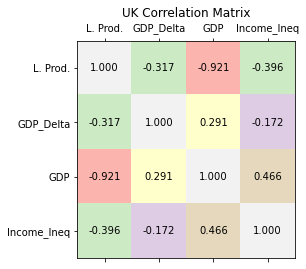

In [13]:
# Calculate correlations for UK...

# find UK data
uk_gdp_delta = gdpdelta_df.iloc[35]
uk_labour = labour_df.iloc[12]
uk_gdp = gdp_df.iloc[38]
uk_income_ineq = income_ineq_df.iloc[41]

# initialise correlation dataframe from 2009 to 2019
corr_df = pd.DataFrame()
corr_df["labour"] = uk_labour[6:].values
corr_df["gdp_delta"] = uk_gdp_delta[1:-1].values
# corr_df["gdp"] = uk_gdp[-11:].values
corr_df["gdp"] = uk_gdp[-11:].values
corr_df["income_ineq"] = uk_income_ineq[2:-1].values

# calculate correlation
corr_df[:-1].astype("float").corr("pearson")

# Plotting
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

uk_corr_data = corr_df[:-1].astype("float").corr("pearson")
    
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(uk_corr_data, cmap="Pastel1")

ax.set_title('UK Correlation Matrix')
axis_labels = ['L. Prod.', 'GDP_Delta', 'GDP', 'Income_Ineq']
ax.set_xticklabels(['']+axis_labels)
ax.set_yticklabels(['']+axis_labels)

for (i, j), z in np.ndenumerate(uk_corr_data):
    ax.text(j, i, '{:0.3f}'.format(z), ha='center', va='center')

plt.show()

/Users/charlesfiguero/opt/anaconda3/envs/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:29: UserWarning:

FixedFormatter should only be used together with FixedLocator

/Users/charlesfiguero/opt/anaconda3/envs/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning:

FixedFormatter should only be used together with FixedLocator



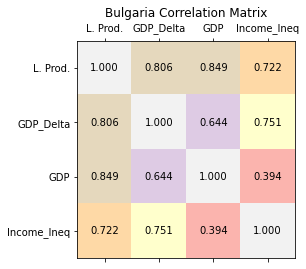

In [14]:
# same again for Bulgaria...

bulgaria_gdp_delta = gdpdelta_df.iloc[5]
bulgaria_labour = labour_df.iloc[2]
bulgaria_gdp = gdp_df.iloc[8]
bulgaria_income_ineq = income_ineq_df.iloc[8]

# initialise correlation dataframe from 2009 to 2019
corr_df_bulgaria = pd.DataFrame()
corr_df_bulgaria["labour"] = bulgaria_labour[6:].values
corr_df_bulgaria["gdp_delta"] = bulgaria_gdp_delta[1:-1].values 
corr_df_bulgaria["gdp"] = bulgaria_gdp[-11:].values
corr_df_bulgaria["income_ineq"]  = bulgaria_income_ineq[2:-1].values

# calculate correlation
bulgaria_corr_data = corr_df_bulgaria[:-1].astype("float").corr("pearson")

# Plotting
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(bulgaria_corr_data, cmap="Pastel1")

ax.set_title("Bulgaria Correlation Matrix")
axis_labels = ['L. Prod.', 'GDP_Delta', 'GDP', 'Income_Ineq']
ax.set_xticklabels(['']+axis_labels)
ax.set_yticklabels(['']+axis_labels)

for (i, j), z in np.ndenumerate(bulgaria_corr_data):
    ax.text(j, i, '{:0.3f}'.format(z), ha='center', va='center')

plt.show()

/Users/charlesfiguero/opt/anaconda3/envs/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
/Users/charlesfiguero/opt/anaconda3/envs/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator


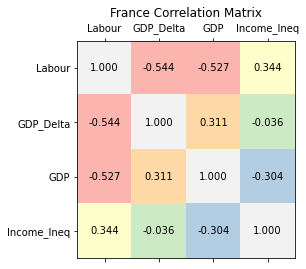

In [5]:
# And France...

france_income_ineq = income_ineq_df.iloc[19]
france_gdp_delta = gdpdelta_df.iloc[13]
france_gdp = gdp_df.iloc[16]
france_labour = labour_df.iloc[11]

# initialise correlation dataframe from 2009 to 2019
corr_df_france = pd.DataFrame()
corr_df_france["labour"] = france_labour[-11:-1].values
corr_df_france["gdp_delta"] = france_gdp_delta[1:-2].values
corr_df_france["gdp"] = list(map(lambda x: str.replace(str(x), ",", ""), france_gdp[-12:-2].values))
# corr_df_france["gdp"] = france_gdp[-12:-1].values
corr_df_france["income_ineq"] = france_income_ineq[2:-2].values

# calculate correlation
france_corr_data = corr_df_france[:-1].astype("float").corr("pearson")


# Plotting
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(france_corr_data, cmap="Pastel1")

ax.set_title("France Correlation Matrix")
axis_labels = ['Labour', 'GDP_Delta', 'GDP', 'Income_Ineq']
ax.set_xticklabels(['']+axis_labels)
ax.set_yticklabels(['']+axis_labels)

for (i, j), z in np.ndenumerate(france_corr_data):
    ax.text(j, i, '{:0.3f}'.format(z), ha='center', va='center')

plt.show()

/Users/charlesfiguero/opt/anaconda3/envs/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
/Users/charlesfiguero/opt/anaconda3/envs/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator


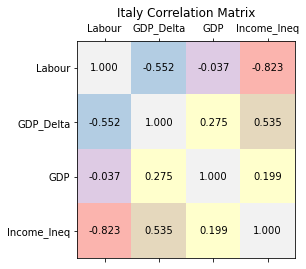

In [6]:
# And Italy

italy_income_ineq = income_ineq_df.iloc[24]
italy_gdp_delta = gdpdelta_df.iloc[15]
italy_gdp = gdp_df.iloc[18]
italy_labour = labour_df.iloc[18]

corr_df_italy = pd.DataFrame()
corr_df_italy["labour"] = italy_labour[-11:].values
corr_df_italy["gdp_delta"] = italy_gdp_delta[1:-1].values
corr_df_italy["gdp"] = list(map(lambda x: str.replace(str(x), ",", ""), italy_gdp[-12:-1].values))
# corr_df_france["gdp"] = france_gdp[-12:-1].values
corr_df_italy["income_ineq"] = italy_income_ineq[2:-1].values

# print(corr_df_france)

# calculate correlation
italy_corr_data = corr_df_italy[:-1].astype("float").corr("pearson")


# Plotting
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(italy_corr_data, cmap="Pastel1")

ax.set_title("Italy Correlation Matrix")
axis_labels = ['Labour', 'GDP_Delta', 'GDP', 'Income_Ineq']
ax.set_xticklabels(['']+axis_labels)
ax.set_yticklabels(['']+axis_labels)

for (i, j), z in np.ndenumerate(italy_corr_data):
    ax.text(j, i, '{:0.3f}'.format(z), ha='center', va='center')

plt.show()

In [7]:
# generalise covariance plot

# # find correlations
# def covariance_plot(country: str):
#     # series for country
#     ineq_series = c_ineq_df[c_ineq_df['Country Name'] == country].squeeze()
#     labour_series = c_labour_df[c_labour_df['Country Name'] == country].squeeze()
#     gdpdelta_series = c_gdpdelta_df[c_gdpdelta_df['Country Name'] == country].squeeze()
#     gdp_series = c_gdp_df[c_gdp_df['Country Name'] == country].squeeze()
    
#     aligned = ineq_series.align(labour_series, join='inner')
#     print(aligned)
#     next_aligned = aligned[0].align(gdpdelta_series, join='inner')
#     final_aligned = aligned[0].align(gdp_series, join='inner')
    
#     print(aligned.corr())
        
#     def get_corr(a: pd.Series, b: pd.Series):
#         aligned = a.align(b, join='inner')
#         df = pd.DataFrame()
#         df['a'] = aligned[0]
#         df['b'] = aligned[1]

#         if 'Country Name' in df.index:
#             df = df.drop('Country Name')
#         if 'Country Code' in df.index:
#             df = df.drop('Country Code')

#         for column in df:
#             df[column] = df[column].astype(float)

#         return df.corr().values[0][1]
        
#     values = {}
#     values['ineq/labour'] = get_corr(ineq_series, labour_series)
#     values['ineq/gdp'] = get_corr(ineq_series, gdp_series)
#     values['ineq/gdpdelta'] = get_corr(ineq_series, gdpdelta_series)
#     values['labour/gdp'] = get_corr(labour_series, gdp_series)
#     values['labour/gdpdelta'] = get_corr(labour_series, gdpdelta_series)
#     values['gdp/gdpdelta'] = get_corr(gdp_series, gdpdelta_series)

#     return values

# covariance_plot('Germany')

In [8]:
# Generalise and cluster...

# get intersecting countries
ineq_cs = income_ineq_df["Country Name"]
not_countries = [8, 9, 10, 14, 15, 16, 17]
ineq_cs = ineq_cs.drop(not_countries)

labour_cs = labour_df['Country Name']
gdp_cs = gdp_df['Country Name']
gdpdelta_cs = gdpdelta_df['Country Name']

# print(gdp_cs)

countries = set(ineq_cs).intersection(set(labour_cs))
countries = countries.intersection(set(gdp_cs))
countries = countries.intersection(set(gdpdelta_cs))

countries = pd.Series(list(countries))


# get dataframes
c_ineq_df = income_ineq_df.loc[income_ineq_df['Country Name'].isin(countries)]
c_labour_df = labour_df.loc[labour_df['Country Name'].isin(countries)]
c_gdp_df = gdp_df.loc[gdp_df['Country Name'].isin(countries)]
c_gdpdelta_df = gdpdelta_df.loc[gdpdelta_df['Country Name'].isin(countries)]


# find correlations
def find_corrs(country: str):
    # series for country
    ineq_series = c_ineq_df[c_ineq_df['Country Name'] == country].squeeze()
    labour_series = c_labour_df[c_labour_df['Country Name'] == country].squeeze()
    gdpdelta_series = c_gdpdelta_df[c_gdpdelta_df['Country Name'] == country].squeeze()
    gdp_series = c_gdp_df[c_gdp_df['Country Name'] == country].squeeze()
        
    def get_corr(a: pd.Series, b: pd.Series):
        aligned = a.align(b, join='inner')
        df = pd.DataFrame()
        df['a'] = aligned[0]
        df['b'] = aligned[1]

        if 'Country Name' in df.index:
            df = df.drop('Country Name')
        if 'Country Code' in df.index:
            df = df.drop('Country Code')

        for column in df:
            df[column] = df[column].astype(float)

        return df.corr().values[0][1]
        
    values = {}
    values['ineq/labour'] = get_corr(ineq_series, labour_series)
    values['ineq/gdp'] = get_corr(ineq_series, gdp_series)
    values['ineq/gdpdelta'] = get_corr(ineq_series, gdpdelta_series)
    values['labour/gdp'] = get_corr(labour_series, gdp_series)
    values['labour/gdpdelta'] = get_corr(labour_series, gdpdelta_series)
    values['gdp/gdpdelta'] = get_corr(gdp_series, gdpdelta_series)

    return values
        

country_corrs = {}
for country in countries.values:
    country_corrs[country] = find_corrs(country)
    
# convert to np array
country_names = []
country_data = []
for country in country_corrs.items():
    country_names.append(country[0])
    data = list(country[1].values())
    country_data.append(data)
    
# print(country_data)

# # testing that covariances are < 1 and > -1 ... 

# flatten = lambda t: [item for sublist in t for item in sublist] 
# flattened = flatten(country_data)
# test = [x for x in flattened if x > 1 or x < -1]
# print(test)

np_country_data = np.array([np.array(xi) for xi in country_data])
# print(np_country_data)

In [9]:
# DBSCAN clustering
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler


# trialling differnt eps values (max neighbour distance) for DBSCAN clustering
ticks = 100
min_samples = 2
print(f"{'eps' : <5}{'num_clusters' : ^20}{f'num_not_noise (out of {len(np_country_data)})' : ^10}")
for i in range(30, ticks, 2):
    eps = (i+1) / (ticks)
    standard_clustering = DBSCAN(eps=eps, min_samples=min_samples).fit(np_country_data)
    
    not_noise = list(filter(lambda x: x != -1, standard_clustering.labels_))
    
    num_not_noise = len(not_noise)
    num_labels = len(set(not_noise))
    
    print(f"{eps : <5}{num_labels : ^20}{num_not_noise : ^10}")

eps      num_clusters    num_not_noise (out of 32)
0.31          0              0     
0.33          1              2     
0.35          2              4     
0.37          3              6     
0.39          3              6     
0.41          3              7     
0.43          4              9     
0.45          5              11    
0.47          5              11    
0.49          6              15    
0.51          6              15    
0.53          6              15    
0.55          6              15    
0.57          6              15    
0.59          6              15    
0.61          6              15    
0.63          6              15    
0.65          6              16    
0.67          7              19    
0.69          7              20    
0.71          7              20    
0.73          8              22    
0.75          8              23    
0.77          7              25    
0.79          7              25    
0.81          7              26    
0.83         

In [12]:
# Lets choose an eps and min_samples...

eps = 0.87
eps = 0.75
# eps = 0.5
min_samples = 2
standard_clustering = DBSCAN(eps=eps, min_samples=min_samples).fit(np_country_data)

country_labels = zip(country_names, standard_clustering.labels_)

# find countries in each cluster
country_nut_clusters = {k: [] for k in standard_clustering.labels_}
for index, (c_name, label) in enumerate(country_labels):
#     print(f'{name}, {label}')
    country_nut_clusters[label].append(c_name)
    

# Now lets find the means and average covariance for each cluster...

from statistics import mean, variance

def find_means(c_list):
    temp_ineq_df = income_ineq_df.loc[income_ineq_df['Country Name'].isin(c_list)]
    temp_labour_df = labour_df.loc[labour_df['Country Name'].isin(c_list)]
    temp_gdp_df = gdp_df.loc[gdp_df['Country Name'].isin(c_list)]
    temp_gdpdelta_df = gdpdelta_df.loc[gdpdelta_df['Country Name'].isin(c_list)]
    
    def means(df):
        return df.mean().mean()
    
    return means(temp_ineq_df), means(temp_labour_df), means(temp_gdp_df), means(temp_gdpdelta_df)

def variance_of_covariance(c_list):
    ineq_labour = []
    ineq_gdp = []
    ineq_gdpdelta = []
    labour_gdp = []
    labour_gdpdelta = [] 
    gdp_gdpdelta = []
    
    for country in c_list:
        ineq_labour.append(country_corrs[country]['ineq/labour'])
        ineq_gdp.append(country_corrs[country]['ineq/gdp'])
        ineq_gdpdelta.append(country_corrs[country]['ineq/gdpdelta'])
        labour_gdp.append(country_corrs[country]['labour/gdp'])
        labour_gdpdelta.append(country_corrs[country]['labour/gdpdelta'])
        gdp_gdpdelta.append(country_corrs[country]['gdp/gdpdelta'])
        
    return (variance(ineq_labour),variance(ineq_gdp),variance(ineq_gdpdelta),variance(labour_gdp),variance(labour_gdpdelta),variance(gdp_gdpdelta))

def average_covariance(c_list):
    ineq_labour = []
    ineq_gdp = []
    ineq_gdpdelta = []
    labour_gdp = []
    labour_gdpdelta = [] 
    gdp_gdpdelta = []
    
    for country in c_list:
        ineq_labour.append(country_corrs[country]['ineq/labour'])
        ineq_gdp.append(country_corrs[country]['ineq/gdp'])
        ineq_gdpdelta.append(country_corrs[country]['ineq/gdpdelta'])
        labour_gdp.append(country_corrs[country]['labour/gdp'])
        labour_gdpdelta.append(country_corrs[country]['labour/gdpdelta'])
        gdp_gdpdelta.append(country_corrs[country]['gdp/gdpdelta'])
    
    return (mean(ineq_labour),mean(ineq_gdp),mean(ineq_gdpdelta),mean(labour_gdp),mean(labour_gdpdelta),mean(gdp_gdpdelta))
           
print('Clusters...')

# -1 represents means a point has been described as noise
for i in country_nut_clusters.items():
    print(i)
        
print()
print(f'Means...')
cluster_keys = list(country_nut_clusters.keys())
print(f"{'key' : >3}   {'ineq' : <20} {'labour' : <20} {'gdp' : <20} {'gdp_delta' : <20}")
for key in cluster_keys:
    a_mean = find_means(country_nut_clusters[key])
    print(f"{key : >3}   {a_mean[0] : <20} {a_mean[1] : <20} {a_mean[2] : <20} {a_mean[3] : <20}")

print()
print('Average Covariance... ')
print(f"{'key' : >3}   {'ineq/labour' : <15} {'ineq/gdp' : <15} {'ineq/gdp_delta' : <15} {'labour/gdp' : <15} {'labour/gdp_delta' : <15} {'gdp/gdp_delta' : <15}")
for key in cluster_keys:
    an_average_covariance = average_covariance(country_nut_clusters[key])
    
    ineq_labour_formatted = "{:.5f}".format(an_average_covariance[0])
    ineq_gdp_formatted = "{:.5f}".format(an_average_covariance[1])
    ineq_gdpdelta_formatted = "{:.5f}".format(an_average_covariance[2])
    labour_gdp_formatted = "{:.5f}".format(an_average_covariance[3])
    labour_gdpdelta_formatted = "{:.5f}".format(an_average_covariance[4])
    gdp_gdpdelta_formatted = "{:.5f}".format(an_average_covariance[5])
    
    print(f"{key : >3}   {ineq_labour_formatted:<15} {ineq_gdp_formatted:<15} {ineq_gdpdelta_formatted:<15} {labour_gdp_formatted:<15} {labour_gdpdelta_formatted:<15} {gdp_gdpdelta_formatted:<15}")
    
print()
print('Variance of Covariance Matrices... ')
print(f"{'key' : >3}   {'ineq/labour' : <15} {'ineq/gdp' : <15} {'ineq/gdp_delta' : <15} {'labour/gdp' : <15} {'labour/gdp_delta' : <15} {'gdp/gdp_delta' : <15}")
for key in cluster_keys:
    an_var_covariance = variance_of_covariance(country_nut_clusters[key])
    
    ineq_labour_formatted = "{:.5f}".format(an_var_covariance[0])
    ineq_gdp_formatted = "{:.5f}".format(an_var_covariance[1])
    ineq_gdpdelta_formatted = "{:.5f}".format(an_var_covariance[2])
    labour_gdp_formatted = "{:.5f}".format(an_var_covariance[3])
    labour_gdpdelta_formatted = "{:.5f}".format(an_var_covariance[4])
    gdp_gdpdelta_formatted = "{:.5f}".format(an_var_covariance[5])
    
    print(f"{key : >3}   {ineq_labour_formatted:<15} {ineq_gdp_formatted:<15} {ineq_gdpdelta_formatted:<15} {labour_gdp_formatted:<15} {labour_gdpdelta_formatted:<15} {gdp_gdpdelta_formatted:<15}")

# choropleth map plot...

countries_cluster_df = pd.DataFrame()


country_names = country_corrs.keys()
countries_cluster_df['Country Name'] = country_names

countries_cluster_df = countries_cluster_df.merge(c_ineq_df, on='Country Name')
year_vals = list(range(2009,2021))
year_vals = list(map(lambda x: str(x), year_vals))
countries_cluster_df = countries_cluster_df.drop(columns=year_vals)


country_cluster = {}
for k, v in country_nut_clusters.items():
    for country in v:
        country_cluster[country] = k
    
cluster_index = list(map(lambda x: country_cluster[x], country_names))
countries_cluster_df['Cluster Index'] = cluster_index


# plotting
import plotly.express as px

fig = px.choropleth(countries_cluster_df, # dataset to use
                    locations= countries_cluster_df["Country Code"], # column which includes 3 letter country code
                    color=countries_cluster_df["Cluster Index"], # column which dictates the colour of the map
                    hover_name=countries_cluster_df["Country Name"]) # column to add to hover information)
fig.show()

Clusters...
(0, ['Hungary', 'Sweden', 'Italy'])
(1, ['Romania', 'Slovenia', 'Estonia', 'Lithuania'])
(2, ['Luxembourg', 'Germany', 'Malta'])
(3, ['North Macedonia', 'Slovakia', 'Portugal', 'France'])
(4, ['Czechia', 'Poland', 'Ireland'])
(-1, ['Finland', 'Netherlands', 'Iceland', 'Spain', 'Greece', 'Croatia', 'Norway', 'Bulgaria', 'Belgium'])
(5, ['Latvia', 'Denmark'])
(6, ['Austria', 'Cyprus'])
(7, ['Switzerland', 'United Kingdom'])

Means...
key   ineq                 labour               gdp                  gdp_delta           
  0   4.654848484848485    99.62444444444444    739253.2277777777    0.6277777777777778  
  1   5.6031818181818185   69.48499999999999    65825.95208333332    1.4145833333333335  
  2   4.433333333333334    123.14666666666666   1013161.5972222221   2.2694444444444444  
  3   5.046363636363636    80.2311111111111     612976.0854166667    0.8416666666666667  
  4   4.250606060606061    102.45777777777779   283584.3222222222    3.0944444444444446  
 -1   4.8093